### TF-IDF 밑바닥부터 이해하기

In [1]:
import math, sys
from konlpy.tag import Okt

class Filter:

    def __init__(self):    # 클래스의 초기 인스턴스 세팅
        self.words = set()
        self.word_dict = {}
        self.category_dict = {}

    def split(self, text):
        results = []
        twitter = Okt()
        malist = twitter.pos(text, norm=True, stem=True)

        # 실습 2
        # 아래 for 문을 한줄짜리 for 문으로 바꿔보세요 List Comprehension
        
        results = [word[0] for word in malist if not word[1] in ["Josa", "Eomi", "Punctuation"]]
        
#         for word in malist:
#             if not word[1] in ["Josa", "Eomi", "Punctuation"]:
#                 results.append(word[0])

        return results


    def inc_word(self, word, category):    
        if not category in self.word_dict:
            self.word_dict[category] = {}
        if not word in self.word_dict[category]:
            self.word_dict[category][word] = 0
        self.word_dict[category][word] += 1
        self.words.add(word)

    def inc_category(self, category):    
        if not category in self.category_dict:
            self.category_dict[category] = 0
        self.category_dict[category] += 1

    def fit(self, text, category):    
        word_list = self.split(text)
        for word in word_list:
            self.inc_word(word, category)
        self.inc_category(category)

    def score(self, words, category):    
        score = math.log(self.category_prob(category))
        for word in words:
            score += math.log(self.word_prob(word, category))
        return score

    def predict(self, text):
        best_category = None
        max_score = -sys.maxsize
        words = self.split(text)
        score_list = []
        for category in self.category_dict.keys():
            score = self.score(words, category)
            score_list.append((category,score))
            if score > max_score:
                max_score = score
                best_category = category
        return best_category, score_list

    def get_word_count(self, word, category):
        if word in self.word_dict[category]:
            return self.word_dict[category][word]
        else:
            return 0

    def category_prob(self, category):    
        sum_categories = sum(self.category_dict.values())
        category_v = self.category_dict[category]
        return category_v / sum_categories

    def word_prob(self, word, category):    
        n = self.get_word_count(word, category) + 1
        d = sum(self.word_dict[category].values()) + len(self.words)
        return n/d

In [2]:
bf = Filter()

bf.fit("파격 세일 - 오늘까지만 30% 할인",  "광고")
bf.fit("쿠폰 선물 & 무료 배송", "광고")
bf.fit("현대 백화점 세일", "광고")
bf.fit("봄과 함께 찾아온 따뜻한 신제품 소식", "광고")
bf.fit("회원님에게만 추천 드리는 상품", "광고")
bf.fit("인기 제품 기간 한정 세일", "광고")
bf.fit("오늘 일정 확인", "중요")
bf.fit("프로젝트 진행 상황 보고", "중요")
bf.fit("계약 잘 부탁드립니다", "중요")
bf.fit("회의 일정이 등록되었습니다", "중요")
bf.fit("오늘 일정이 없습니다", "중요")
bf.fit("1촌 신청을 기다립니다", "소셜")
bf.fit("1촌이 새로운 게시물을 올렸습니다", "소셜")
bf.fit("강수영님을 아세요?", "소셜")
bf.fit("홍길동님이 회원님의 사진에 좋아요를 눌렀습니다", "소셜")

/Users/masterp/Projects/python_study/nlp/lib/python3.7/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [3]:
pre, scorelist = bf.predict("회원님 재고 정리 할인, 무료 배송")
print("결과 =", pre)
print(scorelist)

결과 = 광고
[('광고', -28.63098590284898), ('중요', -31.0352751217805), ('소셜', -29.557447680306794)]


In [4]:
pre, scorelist = bf.predict("페이스북에서 좋아요를 누르세요!")
print("결과 =", pre)
print(scorelist)

결과 = 소셜
[('광고', -18.733679916888185), ('중요', -18.205276764732332), ('소셜', -16.565247659447806)]


In [7]:
sys.maxsize

9223372036854775807

In [8]:
score = math.log(0.1667)
score

-1.7915594892253888

In [5]:
# 실습 1 
# Filter Class 분석
# 어떤식으로든 상관없습니다
# 예시)
# bf.fit은 text와 뭐를 변수로 받아서 데이터를 처리하는데 어떤 함수를 호출하고 ~~~ 이런 결과가 된다
# bf.predict 는 ~~~~~ 해서 ~~~~~ 이런 결과를 도출한다 

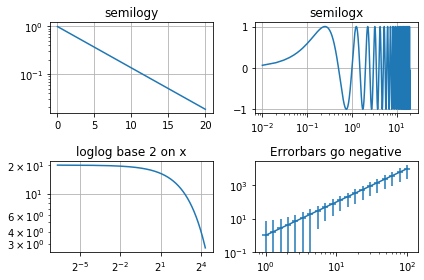

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Data for plotting
t = np.arange(0.01, 20.0, 0.01)

# Create figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# log y axis
ax1.semilogy(t, np.exp(-t / 5.0))
ax1.set(title='semilogy')
ax1.grid()

# log x axis
ax2.semilogx(t, np.sin(2 * np.pi * t))
ax2.set(title='semilogx')
ax2.grid()

# log x and y axis
ax3.loglog(t, 20 * np.exp(-t / 10.0), basex=2)
ax3.set(title='loglog base 2 on x')
ax3.grid()

# With errorbars: clip non-positive values
# Use new data for plotting
x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0

ax4.set_xscale("log", nonposx='clip')
ax4.set_yscale("log", nonposy='clip')
ax4.set(title='Errorbars go negative')
ax4.errorbar(x, y, xerr=0.1 * x, yerr=5.0 + 0.75 * y)
# ylim must be set after errorbar to allow errorbar to autoscale limits
ax4.set_ylim(bottom=0.1)

fig.tight_layout()
plt.show()